In [1]:
None

# Data Analysis

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Summary](#Summary)
    - [Metadata Handover](#Metadata-Handover)

## Sample Records Analysis

Swissbib has provided a data file with some records [[SwRe](./A_References.ipynb#swre)]. In this section, the data file will be loaded and some sample data records will be shown.

In [2]:
import os

path_data = './data'

# If Swissbib's data file happens to be present, the unzip command would halt the process.
if os.path.exists(os.path.join(path_data, 'job7r4A1.json')):
    # => Delete data file if present.
    os.remove(os.path.join(path_data, 'job7r4A1.json'))

! unzip $path_data/datafile.zip -d $path_data/

Archive:  ./data/datafile.zip
  inflating: ./data/job7r4A1.json    


The provided file has a size of more than 100MB. Due to its size, it cannot be checked in into a github repository. In order to check in the file nonetheless, it has been compressed with a standard zip format. The code cell above extracts the file and stores it in the same directory as the original zip file.

In [3]:
import json

records = []
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded {:,d}'.format(len(records)))

Number of data records loaded 183,407


The data has been read into a list of records. Let's have a look at the loaded data.

In [4]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '700': [], '800':...","{'110': [], '710': [], '810': []}",1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...","{'110': [], '710': [], '810': []}",1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '700': [], '800': [], ...","{'110': [], '710': [], '810': []}",1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [5]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"700":[],"800":[],"245c":["André Schluchter"]},"corporate":{"110":[],"710":[],"810":[]},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"700":[],"800":[],"245c":["von Werner Naegeli"]},"corporate":{"110":[],"710":[],"810":[]},"pubyear":"1986 

Now, the extracted data file is not needed anymore and can be removed with the goal to keep the original zip file, only.

In [6]:
# Swissbib's data file is not needed in unzipped form anymore
if os.path.exists(os.path.join(path_data, 'job7r4A1.json')):
    # Delete data file
    os.remove(os.path.join(path_data, 'job7r4A1.json'))

print('Number of records {:,d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183,407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format     

Swissbib's data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [7]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '700': [], '800':...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes'], '700': ['SchayeghL...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph', ...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon'], '700': [], '...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [12]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [13]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate     {'110': ['St. Gallischer Hilfsverein'], '710':...
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [14]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

An analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to a specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [15]:
# Initialize the global dictionary
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [16]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the next chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [17]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

In [18]:
# Initialize list of dictionary item
columns_metadata_dict['data_analysis_columns'] = []

### 035liste

In [19]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [20]:
daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [21]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [22]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [23]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


23665     [(OCoLC)1033660856, (NEBIS)011195038, (OCoLC)1...
67624     [(OCoLC)604105924, (IDSBB)004812904, (RERO)vtl...
29077                 [(OCoLC)1085876191, (NEBIS)011330818]
82522     [(VAUD)991021198567602852, (EXLNZ-41BCULAUSA_N...
35803     [(OCoLC)947279849, (NEBIS)011289279, (OCoLC)94...
57676                                    [(RERO)R008891214]
73853                  [(NEBIS)006223490, (IDSBB)004871102]
112929                                   [(RERO)R008899857]
135254    [(SERSOL)ssib007433362, (VAUD)9910211204318028...
179898    [(VAUD)991021077526502852, (OCoLC)40809772, (C...
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [24]:
columns_metadata_dict['strings_columns'] = ['century']

With its data extract [[SwRe](./A_References.ipynb#swre)], Swissbib forwards the year of publication of a bibliographic unit in attribute $\texttt{century}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)], if the bibliographic unit has been published in a specific year as may be the case for a regular book. If the bibliographic unit has been published during a time period, like for example a periodical, the first year of publication is stored [[WiCo2001](./A_References.ipynb#wico2001)].

In [25]:
daf.find_empty_in_column(df, columns_metadata_dict, 'century')

Number of records with filled century 183407, with missing century 0 => 100.0%


Attribute $\texttt{century}$ holds strings of length 4 that can predominantly be interpreted as year-dates [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples and the top-most quantity distribution are shown below.

In [26]:
df['century'].sample(n=15)

19900     2011
122025    2018
25862     2019
181016    2019
135958    1952
26048     2018
120614    2019
152534    2003
35239     2018
174502    1992
126032    2001
126087    2008
51216     2017
88175     1716
101382    1872
Name: century, dtype: object

In [27]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [28]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [29]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The list of year-dates without any unknown value is shown below.

In [30]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

Expecting the data extract provided is a statistically random sample, the following graph shows the publishing activity of Western European literature. Be aware that the displayed data is only an extract of the full Swissbib data, though.

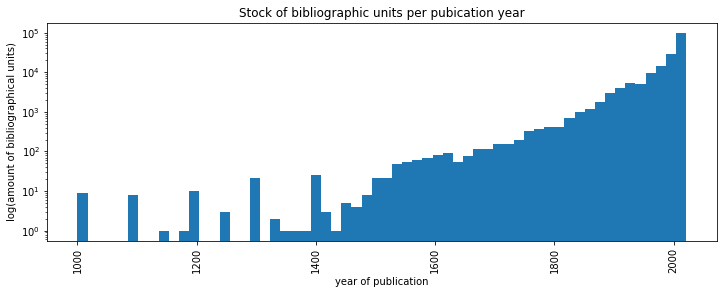

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

Care has to be taken with this attribute considering Swissbib's deduplication implementation. There, the attribute holds the century of publication instead of its full year [[WiCo2001](./A_References.ipynb#wico2001)]. The data extract offers with $\texttt{decade}$, see below, an additional attribute holding the same data as $\texttt{century}$. Even more, attributes $\texttt{exactDate}$ and $\texttt{pubyear}$ offer an extended version of attribute $\texttt{century}$. Due to these redundancies, the attribute will be dropped for the feature matrix and one of the extended attributes with the same data will be taken into account.

In [32]:
#columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [33]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographic unit of format map.

In [34]:
daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [35]:
daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [36]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

114798                        [E0064004, N0465343]
61409     [E0055427, E0055432, N0474810, N0474813]
1846                          [E0071440, N0460829]
114722                        [E0093317, N0472148]
51142                                           []
113753                        [E0085122, N0470934]
71382                                           []
114703                        [E0091844, N0470552]
27785                         [E0092502, N0465328]
113696                        [E0083728, N0470939]
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [37]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

20644     [E0054415, E0054415, N0480000, N0480005]
53969     [E0080312, E0080322, N0475934, N0475924]
20694     [E0073306, E0073408, N0471208, N0471158]
145721    [E0053832, E0053842, N0465129, N0465123]
57054     [E0203500, E0201900, N0383100, N0383100]
122281    [E0050137, E0071337, N0474905, N0475341]
133537    [E0070205, E0070202, N0463814, N0463809]
137329    [E0082310, E0082314, N0464707, N0464711]
83161     [E0073547, E0073544, N0465345, N0465341]
138344    [E0053613, E0053623, N0475929, N0475919]
Name: coordinate, dtype: object

In [38]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [39]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. The contents of the field will be transformed according to Swissbib's project team suggestion [[WiCo2001](./A_References.ipynb#wico2001)] with the help of a function $\texttt{.split}\_\texttt{coordinate}()$.

In [40]:
df = dpf.split_coordinate(df)

The function extracts the first element of the list starting with letter 'E' for East or 'W' for West. It then normalizes the string to a string of length 8, removing all '.' and ' ' characters beforehand. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{E}$.

In [41]:
df.coordinate_E[df.coordinate_E.apply(lambda x : x!='')].sample(n=20)

59346     e0200700
114421    e0091857
131853    e0094625
103679    e0092100
113700    e0084423
116023    e0021500
59528     e0233400
126873    e0065350
23588     e0065226
148575    w0012141
36020     e0055120
54315     e0130500
15758     e0063627
62365     e0055700
11950     w1800000
132936    e0055230
142887    e0073400
126766    e0064015
104571    e0065253
113698    e0084423
Name: coordinate_E, dtype: object

As a next step, the same procedure is done with the first list element starting with letter 'N' for North or 'S' for South. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{N}$.

In [42]:
df.coordinate_N[df.coordinate_N.apply(lambda x : x!='')].sample(n=20)

126754    n0464040
111179    n0582400
146886    n0433700
31077     n0472156
114722    n0472148
76582     n0493500
126878    n0465348
28414     n0493600
56835     n0464811
114820    n0464709
114793    n0465340
106141    n0325300
114790    n0465337
87372     n0491600
54208     n0470702
126582    n0475200
87935     n0555000
114291    n0471558
146672    n0465956
35950     n0462000
Name: coordinate_N, dtype: object

In [43]:
print('East / west coordinates? ', df.coordinate_E.str[0].unique())
print('North / south coordinates? ', df.coordinate_N.str[0].unique())

East / west coordinates?  [nan 'e' 'w']
North / south coordinates?  [nan 'n' 's']


Both new attributes are used for further processing, while the original attribute $\texttt{coordinate}$ is dropped.

In [44]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [45]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three different key value pairs. For the analysis in this subsection, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary using a special function $\texttt{.transform}\_\texttt{dictionary}\_\texttt{to}\_\texttt{list}()$. The values then come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$ will be used to process its elements into one single string of the new column.

In [46]:
df.corporate.sample(n=20)

24267                     {'110': [], '710': [], '810': []}
149953    {'110': [], '710': ['Croatian Olympic Committe...
104431                    {'110': [], '710': [], '810': []}
1504                      {'110': [], '710': [], '810': []}
33216                     {'110': [], '710': [], '810': []}
66299                     {'110': [], '710': [], '810': []}
181184                    {'110': [], '710': [], '810': []}
177215       {'110': [], '710': ['Essl Museum'], '810': []}
54740                     {'110': [], '710': [], '810': []}
136969                    {'110': [], '710': [], '810': []}
40709                     {'110': [], '710': [], '810': []}
55272                     {'110': [], '710': [], '810': []}
87346                     {'110': [], '710': [], '810': []}
105724                    {'110': [], '710': [], '810': []}
80988                     {'110': [], '710': [], '810': []}
106998                    {'110': [], '710': [], '810': []}
151439    {'110': ['International Olympi

In [47]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%
Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%
Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographic units are units produced by persons, not corporates.

In [48]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [49]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [50]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,verein deutscher bibliothekareregionalverband ...,verein deutscher bibliothekareregionalverband ...
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,heilsarmeenationales hauptquartier bern,salvation armynationales hauptquartier
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [51]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

149929    summer olympic games. organizing committee. 27...
122020                          centre de santé la corbière
158998    national olympic committee of the republic of ...
149452    jeux asiatiques en salle. comité d'organisatio...
164909    international olympic committee. coordination ...
165701          olympic invitation committee of minneapolis
160036             société de la candidature vancouver 2010
18821                                   medartis holding ag
167920    olympic winter games. organizing committee. 23...
161372    olympic winter games. organizing committee. 18...
168424    olympic winter games. organizing committee. 3,...
156609    olympic winter games. organizing committee. 15...
82406                                                fevers
164916    summer olympic games. organizing committee. 26...
155811                     association olympique canadienne
151213         international olympic games. 2, athēna, 1906
162822    olympic winter games. organizi

In [52]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

125469    manoir de la ville de martigny, galerie zur sc...
150281                              norges olympiske komité
116739    luganoinscena (lugano), lac lugano arte e cult...
75009     schweizerischer centralverein vom roten kreuzz...
130272                               université de lausanne
135903      gesellschaft für schweizerische kunstgeschichte
9523                                  hespèrion xxi (basel)
20242                                          kirschgarten
153215             youth development through football (ydf)
130848    friche la belle de mai (marseille, france), gu...
75947                         bananafish gallery (shanghai)
53083     national science foundationconference board of...
82421            katholischer kirchenbauverein (st. gallen)
92638                                    panochovo kvarteto
42078                                          ebrary, inc.
103744                           altonaer museum in hamburg
150500    conférence des ministres europ

In [53]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

106179                              hallwag kümmerly + frey
25374                 schweizbundesamt für landestopografie
94673                                             hécatombe
94679                                             hécatombe
133706    carnegie endowment for international peace.div...
72548                                         werbung kiser
72556                                         werbung kiser
138344                schweizbundesamt für landestopografie
110597                              hallwag kümmerly + frey
25428                 schweizbundesamt für landestopografie
106150                              hallwag kümmerly + frey
106184                              hallwag kümmerly + frey
106199                              hallwag kümmerly + frey
30888                 schweizbundesamt für landestopografie
61902                               hallwag kümmerly + frey
72562                                         werbung kiser
110572                              hall

In [54]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080     {'110': [], '710': [], '810': ['Wirtschaftsuni...
47145     {'110': ['Biochemical Society (Great Britain)S...
52134     {'110': [], '710': ['Kunsthandlung Helmut H. R...
94673     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94674     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94678     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94679     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94680     {'110': [], '710': ['Ensemble Batida', 'Hécato...
113869    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
113870    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
133706    {'110': ['Carnegie Endowment for International...
133739    {'110': [], '710': [], '810': ['DeutschlandVer...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

The contents of attribute $\texttt{corporate}$ results from varying interpretation and filling. Some institutions have used key 110 and others 710 as their leading corporate data field. Swissbib's recommendation is to concatenate the two remaining $\texttt{corporate}$ fields into one single $\texttt{corporate}$ field [[WiCo2001](./A_References.ipynb#wico2001)]. The two remaining attributes will be taken into one and will be processed to the feature matrix as one single attribute. This will be implemented in a separate function $\texttt{.concatenate}\_\texttt{corporate}\_\texttt{keys}()$, the result of which is shown below for some sample cases.

In [55]:
df = dpf.concatenate_corporate_keys(df)
df[['corporate_full', 'corporate_110', 'corporate_710']].loc[[0, 6, 1852, 14405, 183000, 183009]]

,corporate_full,corporate_110,corporate_710
0,,,
6,christkatholische kirchgemeinde (bern),,christkatholische kirchgemeinde (bern)
1852,the keywords project,the keywords project,
14405,zéphyr combo,zéphyr combo,zéphyr combo
183000,fbm communications (zürich) theater 11 (zürich),fbm communications (zürich),theater 11 (zürich)
183009,spinas civil voices (zürich) fairmed (bern),spinas civil voices (zürich),fairmed (bern)


In [56]:
len(df['corporate_full'].loc[0])

0

In [57]:
display(df.corporate_full[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20))
display(df.corporate_full[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20))

156704                      international olympic committee
29626     basel-stadtgrosser ratumwelt-, verkehrs- und e...
51316     england and walessovereign (1660-1685 : charle...
166620             fédération internationale de volley-ball
56848       olg murten freiburger orientierungslauf-verband
160634    comité pour la candidature de pékin aux jeux o...
156598    summer olympic games. organizing committee. 22...
168821                      international olympic committee
155604    panamerican sportive games. organizing committ...
169758                          ceského olympijského výboru
154475    summer olympic games. organizing committee. 30...
152993         comité international des jeux méditerranéens
150952    comité pour la candidature de pékin aux jeux o...
51506     england and walessovereign (1660-1685 : charle...
168359    olympic winter games. organizing committee . 2...
32492                                     pro infirmis bern
154902    olympic winter games. organizi

153161    international olympic committee ims/studio 6 t...
90132            osgoode society for canadian legal history
129336                                           australien
139444                  fellowship of postgraduate medicine
139339               ecal/école cantonale d'art de lausanne
170801    mediterranean games. organizing committee. 11,...
78029                                                  oecd
122476    geneva centre for the democratic control of ar...
162011                                       omega (bienne)
41273                                           mayo clinic
44047                         union of concerned scientists
22238                          berkeley linguistics society
157161    clearing house (bruxelles) conseil de l'europe...
161624    fédération internationale de médecine sportive...
3893             english baroque soloists, monteverdi choir
30688            daniel jenny & co., weberei und konfektion
78896             bundesverband feuchte 

In [58]:
columns_metadata_dict['data_analysis_columns'].append('corporate_full')

### decade

In [59]:
columns_metadata_dict['strings_columns'].append('decade')

Attribute $\texttt{decade}$ holds identical data to attribute $\texttt{century}$, out of Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], see code cell below and its identical MARC 21 definition [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The purpose of the field in Swissbib's conventional deduplication implementation is to hold the decade of the year of origin of a bibliographic unit and store it for comparison [[WiCo2001](./A_References.ipynb#wico2001)].

In [60]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ with an extension of the data of this attribute. Therefore, attribute $\texttt{decade}$ will be dropped for further processing.

### docid

In [61]:
columns_metadata_dict['strings_columns'].append('docid')

In [62]:
daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [63]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [64]:
columns_metadata_dict['list_columns'].append('doi')

In [65]:
daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 9553, with missing doi 173854 => 5.2%


Attribute $\texttt{doi}$ is a digital object identifier. As specified in [[MARC](./A_References.ipynb#marc21)], the field holds several standard numbers [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The attribute holds a list of string elements. Some samples are shown below.

In [66]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1899         [10.5451/unibas-007052902]
1937         [10.5451/unibas-007052953]
4710           [10.14361/9783839445334]
10480        [10.5451/unibas-007052913]
11917       [10.1007/978-1-4939-6572-4]
15775    [10.5771/1439-880X-2018-3-362]
16124            [10.3931/e-rara-74297]
16194           [10.4324/9781138604391]
16212            [10.3931/e-rara-74297]
16219            [10.3931/e-rara-74297]
16222            [10.3931/e-rara-74297]
16244            [10.3931/e-rara-74297]
16245            [10.3931/e-rara-74297]
16256            [10.3931/e-rara-74297]
16265           [10.4324/9781315562193]
16301           [10.4324/9781315692845]
16354            [10.3931/e-rara-74439]
16356                  [10.3726/b14897]
16447           [10.4324/9781315150918]
16637          [10.1186/1478-4505-8-31]
Name: doi, dtype: object

In [67]:
df.doi[df.doi.apply(lambda x : len(x))>0].sample(n=20)

103029    [10.5167/uzh-168756, 10.1038/s41559-019-0817-2]
96791                              [10.5169/seals-789837]
61230                                [10.5167/uzh-165825]
46076                         [10.1007/978-3-319-93127-2]
34326                                [10.5167/uzh-129850]
58360            [10.5167/uzh-161334, 10.3390/rs10101593]
44632                         [10.1007/978-3-319-99238-9]
97383                              [10.5169/seals-790713]
96813                              [10.5169/seals-789859]
96745                              [10.5169/seals-789969]
17481                [10.1016/b978-0-323-48420-6.00082-x]
53533                                [10.5167/uzh-165421]
93028                              [10.3931/e-rara-75592]
97803                      [10.1016/j.cortex.2018.10.020]
19494                              [10.3931/e-rara-75955]
74168         [10.1093/acprof:oso/9780190277154.003.0016]
88605                             [10.7591/9781501718649]
148686        

In [68]:
df.loc[51889]

docid                                                     554871254
035liste          [(VAUD)991021210193902852, (CKB)41000000059582...
isbn                                                [3-319-93133-4]
ttlfull           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
ttlpart           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
person            {'100': [], '700': ['ShakoorAbdul', 'CatoKerry...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    2019    
decade                                                         2019
century                                                        2019
exactDate                                                  2019    
edition                                               1st ed. 2019.
part                                                             []
pages                               [1 online resource (122 pages)]
volumes                             [1 online re

In [69]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.doi.apply(lambda x : len(x))))

9,553 records hold 1 list element(s).
2,232 records hold 2 list element(s).
=> Maximum number of list elements 2


Swissbib's deduplication implementation compares only real doi identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real doi identifiers can be found with the help of a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a doi can be identified as a string starting with '10.'. Furthermore, each row in the data has a maximum of 1 real doi identifier [[WiCo2001](./A_References.ipynb#wico2001)]. This logic will be used to isolate the real doi from all non-doi identifiers in a row. A function $\texttt{.reduce}\_\texttt{to}\_\texttt{doi}\_\texttt{element}()$ has been implemented that takes care of this isolation and stores only real doi identifiers in attribute $\texttt{doi}$.

In [70]:
df = dpf.reduce_to_attrib_element(df, 'doi')

df.doi[df.doi.apply(lambda x : len(x)>0)].sample(n=20)

46803          10.1524/9783486593525
97518           10.5169/seals-790931
104727            10.5167/uzh-162911
90523        10.1021/acs.est.5b00742
96407           10.5169/seals-790203
30402             10.5167/uzh-162058
84899       10.3929/ethz-b-000322318
58549          10.4337/9781788111324
97193           10.5169/seals-790617
35143       10.3929/ethz-b-000318803
98206             10.5167/uzh-168647
97146           10.5169/seals-790870
102956            10.5167/uzh-160138
172631            10.5167/uzh-168344
16644     10.1038/s41598-018-28999-2
96917           10.5169/seals-789936
97072           10.5169/seals-790554
53142           10.5169/seals-789612
49851             10.5167/uzh-162768
89442          10.7591/9781501724015
Name: doi, dtype: object

In [71]:
columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [72]:
columns_metadata_dict['strings_columns'].append('edition')

In [73]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [74]:
edition_sample_index = df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=20).index
df.edition.loc[edition_sample_index]

16951                         2. Auflage
57599                          [Réimpr.]
66967                             4e éd.
32275      2a ed. accresciuta e corretta
128157     Ausgabe Ebnat-Kappel, Nesslau
132175                        1. Auflage
59919                         5. Auflage
138699         4., aktualisierte Auflage
16554                         1. Auflage
15313                        Bearb. Fass
31683                           Di 1 ban
113780                        2. Auflage
57895      Zweiter unveränderter Abdruck
45390                            1a. ed.
109702                            1st ed
121425                            1st ed
16389                        Privatdruck
54698     First trade paperback printing
130455     Ninth edition, global edition
75247                           Di 1 ban
Name: edition, dtype: object

Swissbib's deduplication logic normalizes this attribute strongly [[WiCo2001](./A_References.ipynb#wico2001)]. Goal of their normalization process is to treat different variants of the edition statements in the same way. The normalization comprises mainly extracting and isolating number digits out of the original string of the attribute. But also, they convert words expressing numbers to number digits. The first part of their normalization process, extracting number digits, will be done as well in this capstone project. For this purpose, a special function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string}()$ has been implemented for attribute $\texttt{edition}$.

In [75]:
df = dpf.isolate_number_from_string(df, 'edition')
df.edition.loc[edition_sample_index]

16951     2
57599      
66967     4
32275     2
128157     
132175    1
59919     5
138699    4
16554     1
15313      
31683     1
113780    2
57895      
45390     1
109702    1
121425    1
16389      
54698      
130455     
75247     1
Name: edition, dtype: object

In [76]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 16390, with missing edition 167017 => 8.9%


As a result of this processing of attribute $\texttt{edition}$, the numer of filled rows has been reduced further.

In [77]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [78]:
columns_metadata_dict['strings_columns'].append('exactDate')

Attribute $\texttt{exactDate}$ holds the same values like attribute $\texttt{pubyear}$, see below. In comparison with $\texttt{century}$ and $\texttt{decade}$, the full years of publication of a bibliographic unit are stored in the first four digits of the attribute [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. For bibliographic units that appear over a time period, the second four digits correspond to the last year of publication. In case of units that appear within one year, the second four digits may hold the copyright date or the original year of publication of a reprint may be stored, instead. For some bibliographic units, it is possible that the attribute holds month and day indication instead of a year in the last four digits [[WiCo2001](./A_References.ipynb#wico2001)].

In [79]:
daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [80]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [81]:
df.exactDate[df.exactDate.str[4:].str.contains('\D')].unique()

array(['1992    ', '1986    ', '1923    ', ..., '1966-196', 'uuu1    ',
       '201007  '], dtype=object)

Missing information is not only added with the help of character 'u', but with ' ' (space character) and even '-' characters, unfortunately. For data cleaning resons, any character that is not a number digit will be replaced by 'u'.

In [82]:
def determine_uniques_non_numbers(exact_date):
    unique_non_numbers = set()

    for i in range(4, 8):
        unique_non_numbers = unique_non_numbers.union(set(exact_date.str[i:i+1][
            exact_date.str[i:i+1].str.contains('\D')].unique()))

    print('Non-digit characters are', unique_non_numbers)

    return

determine_uniques_non_numbers(df.exactDate)

Non-digit characters are {' ', 'u', '-'}


In [83]:
def print_degree_of_filling(exact_date):
    print('Degree of non-number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('\D')].count()/len(df)*100))
    print('Degree of full and exclusively number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('[0-9]{4}')].count()/len(df)*100))
    return

print_degree_of_filling(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


In [84]:
df = dpf.clean_exactDate_string(df)

print_degree_of_filling(df.exactDate)
determine_uniques_non_numbers(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%
Non-digit characters are {'u'}


In [85]:
df.loc[183319]

docid                                                     556987284
035liste                         [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                             []
ttlfull           {'245': ['Altered limbic and autonomic process...
ttlpart           {'245': ['Altered limbic and autonomic process...
person            {'100': [], '700': ['TemplinChristian', 'Hängg...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    20190414
decade                                                         2019
century                                                        2019
exactDate                                                  20190414
edition                                                            
part                                             [40(15):1183-1187]
pages                                                            []
volumes                                         

The MARC data declares explicitly the kind of value, the second four digits are about. This specification is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Swissbib treats such differences in a varying way in its deduplication implementation, depending on the specific kind of value. Due to its full information supply, attribute $\texttt{exactDate}$ is taken as is to the feature matrix. The attribute will be taken as full placeholder for the three attributes $\texttt{century}$, $\texttt{decade}$, and $\texttt{pubyear}$.

In [86]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [87]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis). Swissbib's deduplication implementation splits this attribute for its comparison logic and uses only parts of it [[WiCo2001](./A_References.ipynb#wico2001)].
- The full code is used for values starting with VM01, VM02, MU03, MU04, and CF01.
- The first four and last two digits are used for all other values of the attribute.

In [88]:
daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [89]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

165260    bk020000
177787    bk020300
25395     bk020000
127725    bk020000
154644    bk020000
47643     bk010000
128078    bk020000
142596    bk020000
58809     bk020800
33192     bk020053
Name: format, dtype: object

In [90]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [91]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

156306    
168261    
169564    
167603    
151920    
152926    
159265    
154979    
164187    
155759    
Name: format, dtype: object

In [92]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [93]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of a bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and an inferior reliability due to freedom of interpretation. For this capstone project, a different processing of the attribute compared to the Swissbib implementation is tested. The attribute is divided into two new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the six subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [94]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
29803,bk020000,bk,020000
66364,bk020000,bk,020000
50291,bk020000,bk,020000
101324,bk020053,bk,020053
25415,bk020000,bk,020000
43238,bk020053,bk,020053
48355,bk020000,bk,020000
94355,bk020000,bk,020000
97672,bk010053,bk,010053
32436,cr030600,cr,030600


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format}()$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py).

In [95]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [96]:
columns_metadata_dict['list_columns'].append('isbn')

In [97]:
daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


Attribute $\texttt{isbn}$ holds two different kinds of information, either the ISBN or the ISSN of a bibliographic unit. The ISBN is the identifier for monographs, while the ISSN identifies periodicals. An ISBN is either of length 10 or of length 13, an ISSN is of length 8. Due to this length attribution, it is not relevant whether the field holds an ISBN or an ISSN.

In [98]:
df.isbn[df.isbn.apply(lambda x : len(x)==1 )].sample(n=20)

19654            [978-3-03736-075-0]
164328           [978-1-137-55925-8]
62546            [978-2-36762-826-4]
88389            [978-1-4875-8942-4]
161439               [1-876718-42-0]
138947               [2-940153-26-4]
144356           [978-3-7780-6580-8]
137177           [978-0-19-069148-6]
174780    [978-1-4614-6089-3 (ebk.)]
7669             [978-3-86728-112-6]
176458               [2-7234-1754-9]
158414           [978-85-7680-131-3]
100781           [978-1-108-37787-4]
178161               [0-87011-391-7]
101165           [978-1-108-34103-5]
148355           [978-0-393-06262-5]
126067               [3-446-21776-2]
101348           [978-1-108-56164-8]
64852                [2-85704-214-0]
39462            [978-1-4008-8189-5]
Name: isbn, dtype: object

The attribute is a list of string elements. Some samples with exactly one string element are shown above, some samples with more than one string element are shown below.

In [99]:
df.isbn[df.isbn.apply(lambda x : len(x)>1 )].sample(n=20)

37289     [978-3-486-74910-6 (pbk.), 3-486-74910-2 (pbk....
126177                   [978-3-589-16174-4, 3-589-16174-4]
46047                    [978-3-525-30190-6, 3-525-30190-1]
125598                   [978-3-7618-2213-5, 3-7618-2213-8]
172990    [978-2-35433-205-1 (Musée d'Orsay), 978-2-07-0...
74299                    [84-7584-343-3, 978-84-7584-343-8]
120396                   [978-3-658-21762-4, 3-658-21762-6]
130699               [978-1-118-99864-9, 978-1-118-99863-2]
142751                   [978-1-4331-3375-6, 1-4331-3375-X]
124356                       [1-4696-0175-3, 0-8078-6999-6]
20342                [978-3-7618-2075-9, 978-3-476-04677-2]
135633                   [978-3-497-02816-0, 3-497-02816-9]
31683                    [978-7-5203-1029-1, 7-5203-1029-9]
179505                   [3-540-30855-5, 978-3-540-30855-3]
14814                    [978-3-8354-1544-7, 3-8354-1544-1]
182659                   [978-0-9954564-2-6, 0-9954564-2-9]
104163                   [978-3-12-35242

In [100]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.isbn.apply(lambda x : len(x))))

80,688 records hold 1 list element(s).
29,073 records hold 2 list element(s).
3,762 records hold 3 list element(s).
2,331 records hold 4 list element(s).
519 records hold 5 list element(s).
398 records hold 6 list element(s).
173 records hold 7 list element(s).
156 records hold 8 list element(s).
84 records hold 9 list element(s).
76 records hold 10 list element(s).
51 records hold 11 list element(s).
43 records hold 12 list element(s).
29 records hold 13 list element(s).
26 records hold 14 list element(s).
19 records hold 15 list element(s).
18 records hold 16 list element(s).
10 records hold 17 list element(s).
9 records hold 18 list element(s).
8 records hold 19 list element(s).
7 records hold 20 list element(s).
7 records hold 21 list element(s).
7 records hold 22 list element(s).
7 records hold 23 list element(s).
7 records hold 24 list element(s).
5 records hold 25 list element(s).
4 records hold 26 list element(s).
3 records hold 27 list element(s).
3 records hold 28 list elemen

In [101]:
max(df.isbn.apply(lambda x : len(x)))

42

In [102]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

171599    [0-8247-6093-X, 0-8247-6135-9, 0-8247-6137-5, ...
127001    [978-1-315-76651-5, 1-315-76651-5, 1-317-66066...
91242     [978-3-12-607106-2, 3-12-607106-6, 978-3-12-60...
45991     [978-3-11-020418-6 (v. 1 : acidfree paper), 3-...
133692    [0-444-82588-6 (set vols. 1A1B), 0-444-50728-0...
62153     [978-7-5406-6653-8 (set), 7-5406-6653-6 (set),...
20851     [4-89434-420-3, 4-89434-421-1, 4-89434-435-1, ...
113064    [978-4-469-22249-4, 4-469-22249-6, 978-4-469-2...
172802    [0-08-043748-6, 0-08-044323-0, 0-08-044324-9, ...
78410     [978-2-35241-063-8, 978-2-911565-89-2, 978-2-3...
Name: isbn, dtype: object

Attribute $\texttt{isbn}$ is taken to further processing as the list of string elements with their values as they are.

In [103]:
columns_metadata_dict['data_analysis_columns'].append('isbn')

### ismn

In [104]:
columns_metadata_dict['list_columns'].append('ismn')

In [105]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 931, with missing ismn 182476 => 0.5%


Attribute $\texttt{ismn}$ originally held the same data like attribute $\texttt{doi}$ [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. This has been adjusted in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], though. Analogous to attribute $\texttt{doi}$, Swissbib's deduplication implementation compares only real ismn identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real ismn numbers can be identified by a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a real ismn number can be identified as a number starting with a letter 'm' (or 'M') or with the three number digits '979'. Each row in the data has a maximum of 1 real ismn identifyer [[WiCo2001](./A_References.ipynb#wico2001)].

In [106]:
i = 0
while len(df.ismn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.ismn.apply(lambda x : len(x))))

931 records hold 1 list element(s).
123 records hold 2 list element(s).
30 records hold 3 list element(s).
9 records hold 4 list element(s).
4 records hold 5 list element(s).
4 records hold 6 list element(s).
2 records hold 7 list element(s).
1 records hold 8 list element(s).
1 records hold 9 list element(s).
1 records hold 10 list element(s).
1 records hold 11 list element(s).
1 records hold 12 list element(s).
1 records hold 13 list element(s).
1 records hold 14 list element(s).
1 records hold 15 list element(s).
1 records hold 16 list element(s).
1 records hold 17 list element(s).
1 records hold 18 list element(s).
1 records hold 19 list element(s).
1 records hold 20 list element(s).
1 records hold 21 list element(s).
1 records hold 22 list element(s).
1 records hold 23 list element(s).
1 records hold 24 list element(s).
1 records hold 25 list element(s).
1 records hold 26 list element(s).
=> Maximum number of list elements 26


In [107]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

18787           [9790013230075, 9790013230075, M013230075]
21159           [9790013230068, M013230068, 9790013230068]
27903    [9790206300349, 9790206300448, 9790206300370, ...
36355        [9790261242936, 9790261242943, 9790261243407]
46239    [9790674521482, 9790674521499, 9790674521482, ...
Name: ismn, dtype: object

In [108]:
df_temp = dpf.transform_list_to_string(df.copy(), 'ismn')
df_temp.ismn[df_temp.ismn.str.contains('m[0-9]{8}', na=False, regex=True)]

1792                     m500173793
2004      m007093402, 9790007093402
2017                     m700185008
2029                     m001052481
2035      m007096410, 9790007096410
                    ...            
182638                   m501351428
182652                   m501357284
182674                   m501357925
182679                   m501351534
182890                   m008025112
Name: ismn, Length: 421, dtype: object

Analogous to attribute $\texttt{doi}$, a function $\texttt{.reduce}\_\texttt{to}\_\texttt{ismn}\_\texttt{element}()$ has been implemented that takes care of the isolation of the ismn identifier and stores only real ismn identifiers in attribute $\texttt{ismn}$.

In [109]:
df = dpf.reduce_to_attrib_element(df, 'ismn')
df.ismn[df.ismn.apply(lambda x : len(x))>0]

1791      9790201326702
1792         m500173793
2004         m007093402
2017         m700185008
2028      9790008010156
              ...      
182638       m501351428
182652       m501357284
182674       m501357925
182679       m501351534
182890       m008025112
Name: ismn, Length: 931, dtype: object

Unfortunately, the number of rows with a real ismn identifyer is vanishingly small. Attribute $\texttt{ismn}$ will be handed over for further processing in its preprocessed manner but the occurrence will have to be observed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [110]:
columns_metadata_dict['data_analysis_columns'].append('ismn')

### musicid

In [111]:
columns_metadata_dict['strings_columns'].append('musicid')

In [112]:
daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a publisher's number identifying sound carriers, books with music notes, and movies of a music record [[WiCo2001](./A_References.ipynb#wico2001)]. Some sample records are shown below.

In [113]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [114]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
mp       1
cr       1
Name: format_prefix, dtype: int64

In [115]:
musicid_sample_index = df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20).index
df.musicid.loc[musicid_sample_index]

144454                        No d'éd. EMB 633
6850             EMI Classics 7243 5 56415 2 6
26085                                  Z.13378
9073      Pelham power productions 3P 489869 6
93586                                 UE 16773
11606                                 UTR 4769
14781                                831 596-2
11227             Voodoo rhythm records VRCD58
12201                               ACT 9257-2
4235                               CCD-14059-2
12253            Deutsche Grammophon 410 862-2
112698                                KTC 1473
7339                                      3324
2359              Deutsche Grammophon 477 8083
116659                 Bestellnummer: 86245720
56613                               JBO1002002
132675                    Bestellnummer: 20252
9135                                  QFTF/016
3396                      Dreamworks DRD 50052
86404                                A.C. 3341
Name: musicid, dtype: object

In [116]:
df = dpf.isolate_number_from_string(df, 'musicid')
df['musicid'].loc[musicid_sample_index]

144454         633
6850          7243
26085        13378
9073             3
93586        16773
11606         4769
14781          831
11227           58
12201         9257
4235         14059
12253          410
112698        1473
7339          3324
2359           477
116659    86245720
56613      1002002
132675       20252
9135           016
3396         50052
86404         3341
Name: musicid, dtype: object

Swissbib's deduplication logic isolates and extracts number digits out of the original string for this attribute [[WiCo2001](./A_References.ipynb#wico2001)]. This extraction of number digits will be done as well in this capstone project. For this purpose function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string}()$ will be used for attribute $\texttt{musicid}$. The attribute is taken to further processing steps.

In [117]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [118]:
columns_metadata_dict['list_columns'].append('pages')

In [119]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This extraction logic is described to be very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)] and will not be reimplemented for this capstone project. The pages information is part of the information in attribute $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [120]:
columns_metadata_dict['list_columns'] = ['part']

In [121]:
daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. In the Swissbib implementation, the attribute is normalised strongly with the goal to identify the information of a part of a bibliographical unit as a unique number.

In [122]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

54080                                               [3]
133116                                    [Band 79, 79]
92196                                        [vol. 185]
111541                                            [263]
117111                                         [Vol. 3]
133040                                          [Bd. 3]
91341                                         [Band 21]
109435                           [1937, S. 217-222, 39]
22422                       [1998, S. 107-124, Band 35]
72409                                    [No 14 (2002)]
134301                                   [A 1788, 1788]
1855      [37. Jahrgang, Heft 1+2 (2019), Seiten 70-75]
110250                                   [Dritter Band]
126807                            [Blatt 313, Ed. 1910]
74010                                        [Bd. 3, 3]
102674                                 [91415018784703]
21714                                            [6, 6]
97328                                       [-/2

In [123]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [124]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

In [125]:
df = dpf.transform_list_to_string(df, 'part')

The list of strings will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [126]:
df['part'][df['part'].apply(lambda x : len(x)>0)].sample(n=25)

138400                      tome 57, 57
59314                             bd. 1
15211                            55, 55
57082                                 4
17168                    seiten 369-388
67492                                 3
85612          2000, vol. 2, s. 321-327
16219                   bd. 10, part ii
73349                               163
22367                  1999, s. 222-231
27347                  1997, s. 374-385
96626                   -/62(1998-1999)
103322                         134, 134
99450                             11-12
101785              no 860/861, 860/861
93075                           band 46
65331                                47
126075                          band 14
132821                       bd. 78, 78
95699     vol. 7 (1956), seiten 295-296
98488                               165
68840                     63(4):422-423
115244           33/4(2019-04), 295-302
30489                           2018/67
46196                         2018/3/36


The model calculations will show a strong dependency on the number values of the attribute which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown.

In [127]:
samples_part = [102359, 168248, 126195, 177342, 178901, 172234, 180513]

print(df.part.iloc[samples_part])
df = dpf.extract_number_digits_from_string(df, 'part')
print(df.part.iloc[samples_part])

102359              no 250 (2019), annexe, no 95
168248    ahead of print, 10 may 2018, pp. 1-18.
126195                        vol. 8,2, vol. 8,2
177342                                    23, 23
178901                                  2019/228
172234                            26(2017), 7-20
180513                                      1345
Name: part, dtype: object
102359     250 2019 95
168248    10 2018 1 18
126195         8 2 8 2
177342           23 23
178901        2019 228
172234    26 2017 7 20
180513            1345
Name: part, dtype: object


In [128]:
print('Array of unique attribute values\n', df.part.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.part.unique())))

Array of unique attribute values
 ['' '1' '3' ... '867' '2009 201 223' '1962 92 106']

Total number of unique values 21,302


Attribute $\texttt{part}$ will be further processed in this way in the next chapters.

In [129]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [130]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal name statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$ will be used to process its elements into one single string of the new column.

In [131]:
df.person.sample(n=20)

63615     {'100': [], '700': ['Charles', 'RoystonRichard...
55838     {'100': ['BongrainMarcelle'], '700': [], '800'...
155320    {'100': [], '700': [], '800': [], '245c': ['De...
3636      {'100': ['BallardJ. G.'], '700': ['KörberJoach...
152840      {'100': [], '700': [], '800': [], '245c': ['']}
171456      {'100': [], '700': [], '800': [], '245c': ['']}
155030    {'100': ['DysonBrian G.'], '700': [], '800': [...
107378      {'100': [], '700': [], '800': [], '245c': ['']}
58867     {'100': ['FrankMarkus'], '700': [], '800': [],...
3025      {'100': ['SaintongeFrançois'], '700': [], '800...
89362       {'100': [], '700': [], '800': [], '245c': ['']}
124660    {'100': ['SellsPeter'], '700': ['WasowThomas']...
30326     {'100': [], '700': ['MadelénatArnaud'], '800':...
122549    {'100': ['ConejoEmilia'], '700': ['TonnelierBi...
146625    {'100': ['ThülemeyerHeinrich Günther von'], '7...
688       {'100': ['TorrachiniPietro'], '700': [], '800'...
71449     {'100': ['ZaccheoLuigi'], '700

In [132]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%
Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%
Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%
Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [133]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

9672                    erich schmidt-eenboom, ulrich stoll
121013                    marieke verschuuren ... [et. al.]
31401                            [leo ou micheline hilber?]
112017                                     peter kürsteiner
71505                                       luis pietracqua
86339                                    ulrich kollbrunner
15904                                        bonnie mccurry
127751    [r. triana-del río, e. van den burg, r. stoop,...
140917                                       carla manfredi
43705                     von bruno assmann und peter selke
117537                                       niessen, james
80396                                      christine payeux
100719                                      richard l. abel
43535                                       güterbock, carl
161087                  ed. by niels h. secher ... [et al.]
136415                                                moore
52719                                mis

In [134]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

49684                     dumasalexandre
70847                  reissnerelisabeth
66345                           jacobmax
46879     dzi͡a︡dykvladislav kirillovich
65526                      barthesroland
89902                    alexandergerard
60248                  hoffmeisterjohann
87636                   zesenphilipp von
14180                          aslanreza
134594                       kwadealicja
57426                        maussmarcel
60172                       claveldamian
67797                        prousuzanne
153338                    casellageorges
29360                        reevephilip
114943                      tekinalpünal
114002                        pezéwarren
100142                  brönnimannroland
59774                     helmerbenjamin
125364                         waltertim
Name: person_100, dtype: object

In [135]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

178958                   volpepetra, schärlireto, hobilukas
50059                          mention-schaarmarie-castille
22507     holbeinm., béchirm., ludwigs., sommerfeldj., c...
57483                               paloméramarie-france de
92561                            desmarchelierjean-françois
109964                                     gallandfrançoise
43702                                            selkepeter
122730                                        mautecornelia
177819                                         labourierose
123427    klugchristian, pohlealexander, kielsteffen, kr...
94368                       robertsdavid, di natalestefania
137412                                   vom berghans georg
44626     albans., dingermannt., habsm., hagenmeyerm., s...
21155                                            cuiyonghua
181407    draperrichard, drapersamuel, edesbenjamin, fle...
28383                                 reddickallen hilliard
100477                                  

In [136]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

23383               bendis
62793              taymans
133748              cowell
90413             toriyama
50379     goscinny, uderzo
56064             dugomier
8734               rodgers
132816           watterson
55628               blanck
174453            giordani
72677               clancy
112113             eichler
121880               ratte
172537             osborne
30590             rousseau
35053            muszynski
98320           mullenheim
30301           baccalario
15932             charlier
21827          shimabukuro
Name: person_800, dtype: object

According to [[WiCo2001](./A_References.ipynb#wico2001)], attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ hold standardized author information. Swissbib uses $\texttt{person}\_\texttt{245c}$ as a fallback only, in case of missing $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$.

In [137]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.,,jemisin
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person}\_\texttt{245c}$ is identified as the most complete and usefull author indication attribute and will be used as a basis for the data of the feature matrix. Attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ will also be added to the feature matrix.

In [138]:
columns_metadata_dict['data_analysis_columns'].append('person_100')
columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [139]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [140]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [141]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [142]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [143]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

163592                                          [Doubleday]
76664                                          [OPEN HOUSE]
151138                                          [Routledge]
169759    [Rio 2016 Organising Committee for the Olympic...
163495                                             [[s.n.]]
61083                                              [[s.n.]]
7552                                             [Oetinger]
42381                    [Lincoln Institute of Land Policy]
129153                             [Albany: Matthew Bender]
33464                           [Politique Revue de Débats]
153851                               [Région SNCF Chambéry]
161418                         [Japanese Olympic Committee]
151812                                            [COJO 72]
156527                             [Université de Bordeaux]
175298                                               [LOOC]
157668                  [[East Asian Organizing Committee]]
141583                                  

Two kinds of entries stand out as special in the sample data.

In [144]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [145]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


According to [[WiCo2001](./A_References.ipynb#wico2001)], this attribute holds the initial characters that do not correspond to anyone of word strings like ...
- Verl., Verlag, Verlagsgesellschaft,
- publ., publisher,
- ed., editor, edition,
- ...

Swissbib's deduplication logic uses the such abbreviated values of this attribute. For the capstone project, the attribute is taken to further processing as one single concatenated string. The special entries shown above will also be handled as regular publisher's description.

In [146]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [147]:
columns_metadata_dict['list_columns'] = ['pubword']

In [148]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [149]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [150]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [151]:
df[['exactDate', 'pubyear']]

,exactDate,pubyear
0,1992uuuu,1992
1,1986uuuu,1986
2,1923uuuu,1923
3,1947uuuu,1947
4,1991uuuu,1991
...,...,...
183402,2018uuuu,2018
183403,2019uuuu,2019
183404,1930uuuu,1930
183405,2000uuuu,2000


In [152]:
df[df.exactDate.str[:4] != df.pubyear.str[:4]]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c


The four digits of $\texttt{pubyear}$ hold identical data like the first four digits of field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [153]:
columns_metadata_dict['strings_columns'].append('scale')

In [154]:
daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [155]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on map units. The degree of filling in attribute $\texttt{coordinate}$ is correlated with the degree of filling in attribute $\texttt{scale}$.

In [156]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


Like for attribute $\texttt{part}$, this attribute may hold a mixture of number digits and text strings. Even more, the scaling information may have preceeding '1:'.

In [157]:
df['scale'][df['scale'].apply(lambda x : len(x)>0)].sample(n=25)

18353     [Echelle non déterminée]
81281                      2200000
94320                        25000
56864                        15000
87999                      2500000
104538                      160000
61315                       200000
27783                        17400
74028                       200000
35994                        25000
132936                      100000
144918                       20000
114280                       50000
114425                       25000
25064                      1600000
126870                       25000
134743                      100000
113767                       25000
14527                        75000
126751                       25000
53969                 200000200000
55151                        25000
110585                      275000
5031                        300000
106184                       35000
Name: scale, dtype: object

To unify the possible values of this attribute to scaling numbers, two transformations have been implemented. The first transformation will extract only the number digits from the $\texttt{scale}$ string. The output will be a string with space separated numbers. This string will be the input for the second function, which removes explicitly strings '1 '. The effect of both functions applied one after the other is shown for some examples, below.

In [158]:
samples_scale = [178473, 122281, 27755, 23380, 31391, 35950]

print(df.scale.iloc[samples_scale])
df = dpf.extract_number_digits_from_string(df, 'scale')
df = dpf.extract_scaling_from_scale(df)
print(df.scale.iloc[samples_scale])

178473    [Echelle non déterminée]
122281                500000250000
27755                         8100
23380             Echelle 1:50 000
31391                     1:25 000
35950                      1700000
Name: scale, dtype: object
178473                
122281    500000250000
27755             8100
23380           50 000
31391           25 000
35950          1700000
Name: scale, dtype: object


The modified attribute will be taken over to further processing [[WiCo2001](./A_References.ipynb#wico2001)].

In [159]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [160]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [161]:
df.ttlfull.sample(n=20)

31723                  {'245': ['Qingdai de Shiji yanjiu']}
134247    {'245': ['American Nation', 'A History: Analyt...
96035                          {'245': ['Le super saïyen']}
66796                       {'245': ['Léontine Beaugrand']}
119144    {'245': ['Reinhold Niebuhr to William Scarlett...
167973    {'245': ['The international year of volunteers']}
101854                       {'245': ['L'enfant du canal']}
61702     {'245': ['Das Schulweggeheimnis', 'mit Fragen ...
20078     {'245': ['The rise and fall of Nikephoros II P...
119139    {'245': ['Reinhold Niebuhr to William Scarlett...
79257     {'245': ['Sei ciò che dai', 'conversazioni con...
149884    {'245': ['The XIth Olympic Games Berlin, 1936'...
66103     {'245': ['Georges Bataille', 'Emmanuel Tibloux...
17268     {'245': ['[Tätigkeitsberichte, Schweizerischer...
4445      {'245': ['Halleluja!', 'ein Weihnachtsalbum : ...
94295     {'245': ['Weihnachtsausstellung Bernischer Kün...
164216                   {'245': ['La lé

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$ will be used to process the list elements into one single string of the column.

In [162]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%
Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull}\_\texttt{245}$, is filled for every record in the data set. This makes the attribute a central attribute for record pair comparisons. Attribute $\texttt{ttlfull}\_\texttt{246}$ on the other hand is sparsely filled. Some samples are shown below.

In [163]:
df.ttlfull_245.sample(20)

92733     cross-species hybridization and the origin of ...
161228                         seigneurs et forçats du vélo
114291    bern, abschnittsgrenzen "centro" = limites des...
138511    stefan altenburger, objekte, installationen, f...
165013                  the first book of the olympic games
2389                                consolers of the lonely
107660    legislative history of the alaska power admini...
44243                               versicherungsmathematik
169186    economic aspects and the summer olympics, a re...
42274     polymeric surfactants, dispersion stability an...
19656                  fdp. die liberalen kanton st. gallen
84213     verdauung - die beste medizin aus zwei welten,...
9478                                               aranjuez
7226      latium oder das alte rom in seinen sprüchwörte...
115860           half a million images online and counting!
137325    mehr für morgen, das vorsorge-magazin für alle...
54393                                   

In [164]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

129602                      court and the chronic inebriate
29304                                                apollo
177974    association du très-saint et immaculé coeur de...
51733                pre-malthusian doctrines of population
126890    gottfried arnolds unparteiische kirchen- und k...
33346                                      devenir écrivain
30178     série de publications unia - regard sur notre ...
63509     the great and weighty considerations relating ...
103421    tag als ... informatikerin, ingenieurin, pfleg...
108079    implications of treaty on final german settlem...
72316                                        lettres à théo
106498     laws of business for all the states of the union
108182    a treatise on the law of carriers of goods and...
101848    assurances sociales internationales: avant le ...
76112                                                 tttop
14016                                mulher do fim do mundo
133701                                  

In [165]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


According to [[WiCo2001](./A_References.ipynb#wico2001)], attribute $\texttt{ttlfull}\_\texttt{245}$ holds the title of a bibliographic unit as it is appears on its publication. Attribute $\texttt{ttlfull}\_\texttt{246}$ holds variations of the title that appear on the back of a unit or on the cover. Alternative diction and even some very special ideas of the people that have entered the data can be stored in this field.

As $\texttt{ttlfull}\_\texttt{245}$ can vary from $\texttt{ttlfull}\_\texttt{246}$, the two new columns will be used as a basis for the data for the feature matrix.

In [166]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [167]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [168]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [169]:
df.ttlpart.sample(n=20)

44099     {'245': ['Under What Conditions Are Value Chai...
7180      {'245': ['Le Landskron', 'une balade à travers...
163666                      {'245': ['The high jump book']}
32402     {'245': ['Die Aeschbacher-Diät', '50 Lektionen...
6850                         {'245': ['Kiri sings Berlin']}
49376     {'245': ['La double contrainte', 'L'influence ...
38278     {'245': ['Creating and protecting Zambia's wea...
79261                                   {'245': ['Encore']}
110772    {'245': ['Circulating blood cells and extracel...
75466                   {'245': ['La perfection du crime']}
50909     {'245': ['Cristal and Azurite: new tools for i...
93878                     {'245': ['Rilke und Frankreich']}
31460                         {'245': ['Schmidt-Rottluff']}
124497    {'245': ['Diane di Prima', 'visionary poetics ...
168988    {'245': ['A global game', 'sport, culture, dev...
81610     {'245': ['First steps towards an institution o...
139563    {'245': ['Politics of Oil', 'A

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [170]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [171]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [172]:
columns_metadata_dict['list_columns'].append('volumes')

In [173]:
daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages (see attribute $\texttt{pages}$ above), volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Swissbib extracts available information on the volume indication of a bibliographical unit out of its MARC data. This data normalization step is very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)]. Some examples of the attribute's filling are shown below.

In [174]:
df['volumes'].sample(n=15)

14550                                      [1 Compact Disc]
145128                                         [230 Seiten]
125253                                         [153 Seiten]
108635                                                   []
27589                                 [[1] pl., 36, 425 S.]
28087                                           [72 Seiten]
94047     [2, 1, 12, 165 Seiten, 1 unnumbered leaf of pl...
151292                                [1 vol. (non paginé)]
14862                            [1 Compact-Disc (48 Min.)]
80862                                                    []
71947                                              [180 p.]
103385                                     [1 photographie]
19859                                              [691 p.]
136187                                  [1 online resource]
28356                                          [172 Seiten]
Name: volumes, dtype: object

In [175]:
print('=> Maximum number of list elements', max(df.volumes.apply(lambda x : len(x))))

=> Maximum number of list elements 3


In [176]:
df.volumes[df.volumes.apply(lambda x : len(x)==1)].sample(n=15)

117116                                  [1 online resource]
173792                                             [244 p.]
182361                                 [1 Online-Ressource]
146831                                             [472 p.]
122442                                 [1 Online-Ressource]
151911                                              [42 p.]
15583                                      [1 Schallplatte]
24766                                              [312 p.]
179099                  [1 ressource en ligne (55 minutes)]
55833     [1 online resource (1 online resource (378 p.) )]
163644                                             [205 p.]
88170                                              [417 p.]
31462                                    [viii, 280 Seiten]
120283                                  [1 online resource]
176107                                             [143 p.]
Name: volumes, dtype: object

In [177]:
df.volumes[df.volumes.apply(lambda x : len(x)==2)].sample(n=15)

33689              [1 online resource., 1 online resource.]
33968              [1 online resource., 1 online resource.]
39815     [1 online resource (Online-Ressource), 1 onlin...
60700                     [222 pages, 1 DVD-vidéo (90 min)]
60555                   [1 Partitur (7 Seiten), 32 Stimmen]
63320     [1 Online-Ressource ([3], 2 leaves, 3-4 p., 5-...
32902              [1 online resource., 1 online resource.]
72520     [58 verschieden gezählte Blätter, 1 DVD-ROM ; ...
60697                  [1 Partitur (11 Seiten), 67 Stimmen]
60556                  [1 Partitur (13 Seiten), 33 Stimmen]
146694                [1 Band (nicht paginiert), 32 Seiten]
83336                            [Score ( 20 p.), 22 parts]
38737     [1 online resource (Online-Ressource), 1 onlin...
85373                              [Score (24 p.), 5 Parts]
94710                            [92 Seiten, 42 Tierkarten]
Name: volumes, dtype: object

In [178]:
df.volumes[df.volumes.apply(lambda x : len(x)==3)].head()

73897                          [XI, 213 S., Portr., 23 cm]
80258    [1 Partitur (5 Seiten), 32 Stimmen, Wiedlisbac...
Name: volumes, dtype: object

In [179]:
df.volumes.loc[126736]

['XXII, 205 Seiten, XIX Blätter Tafeln']

In [180]:
df.volumes.loc[94679]

['1 flexi disque', '1 volume (sans pagination)']

Attribute $\texttt{volumes}$ comes along as a list of string elements. A function for data preparation has been written to extract all elements out of the list and store them as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [181]:
df = dpf.transform_list_to_string(df, 'volumes')

In [182]:
df['volumes'].sample(n=25)

170283            1 vol. (non paginé)
9186      2 dvd-videos (ca. 102 min.)
101622             1 online-ressource
84862                           20 p.
117495              1 online resource
137273                     198 seiten
75427           8, 342 s., 4 photogr.
94881                                
21402                      351 seiten
31923                 xxv, 176 seiten
138610              1 online resource
134150                  ix, 495 pages
173241                         127 p.
59298                      404 seiten
34764                      214 seiten
119119              1 online resource
169278                          11 p.
104014                  x, 175 seiten
173700                    85 s. 1977.
92443              1 online-ressource
29201                    x, 158 pages
25450                      294 seiten
34122       1 online resource (41 p.)
62832                                
163872            1 vol. (non paginé)
Name: volumes, dtype: object

Analogous to attribute $\texttt{part}$, the model calculations will show a strong dependency on the number values of attribute $\texttt{volumes}$ which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown below.

In [183]:
sample_volumes = [14608, 32325, 50711, 27489, 65788, 142225]

print(df.volumes.iloc[sample_volumes])
df = dpf.extract_number_digits_from_string(df, 'volumes')
print(df.volumes.iloc[sample_volumes])

14608                                      1 disque compact
32325                                                303 p.
50711                                        xx, 488 seiten
27489                                   [1] pl., 36, 425 s.
65788                                            iv, 215 p.
142225    1 online resource (xix, 254 s. 133 abb., 128 a...
Name: volumes, dtype: object
14608                 1
32325               303
50711               488
27489          1 36 425
65788               215
142225    1 254 133 128
Name: volumes, dtype: object


In [184]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['102 114' '43' '75' ... '394 40' '2 327' '26 7']

Total number of unique values 11,150


The attribute will be further processed in this way in the chapters to come.

In [185]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. Out of this analysis, the attributes have been identified that are considered to be relevant for comparison. The list of these attributes is shown below.

In [186]:
columns_metadata_dict['data_analysis_columns']

['coordinate_E',
 'coordinate_N',
 'corporate_full',
 'doi',
 'edition',
 'exactDate',
 'format_prefix',
 'format_postfix',
 'isbn',
 'ismn',
 'musicid',
 'part',
 'person_100',
 'person_700',
 'person_245c',
 'pubinit',
 'scale',
 'ttlfull_245',
 'ttlfull_246',
 'volumes']

During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### Metadata Handover

Dictionary $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$ plays the role of a metadata global variable to be handed over to subsequent chapters of this capstone project. Only the values of key $\texttt{data}\_\texttt{analysis}\_\texttt{columns}$ will be needed as metadata in the next chapter. The values of keys $\texttt{list}\_\texttt{columns}$ and $\texttt{string}\_\texttt{columns}$ can be dropped.

In [187]:
del columns_metadata_dict['list_columns']
del columns_metadata_dict['strings_columns']

To hand over the attributes dictionary of this chapter in its role of metadata, the dictionary is saved into a pickle file that will be read in the next chapter as input. 

In [188]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)